Each Box is a "Cell" in Jupyter, when you click the Run button above itll go to the next Cell and run it, some of it is simply text, you can click next as you're reading things, feel free to skip by all the code if you don't need to see that, just hit run and itll jump to the next cell, no problems.<span style="color:green"><span style="font-family:Courier; font-size:medium;"> Green Text</span></span> is information<span style="color:blue"><span style="font-family:Courier; font-size:medium;"> Blue Text</span></span> is a Transition of speaking.<br><br>
<span style="color:green"><span style="font-family:Courier; font-size:medium;">
Grabbing RotF Data from this pc, starting with basic imports.
Using csv to parse the massive text files we make from the rotf discord bot channels.
    </span></span>              
    


In [80]:
import csv

<span style="color:green"><span style="font-family:Courier; font-size:medium;">
We use this function to read and clean the data we get from the rotf discord channel. Here is an example of what a line looks like from the csv.</span></span><br><br>
['deaths', '2019-07-18 21:16:42.498000', '<@&542343490600828930> : Pekson (6/8, 868) has been crushed by Thusala!']<br><br>
<span style="color:green"><span style="font-family:Courier; font-size:medium;">
upon splitting this single line we get a very disgusting split on the main text that we want so we have to clean up each player, bossname, date and base fame. Basefame from the discord channel is your base fame and not your actual death fame, using a bracketed system we've made a crude estimate of each death (Feel tree to tweak these numbers as you see fit.)
</span></span>

In [81]:
def loot_data():
    with open('Loot.txt', 'r') as file:
        items = {} #Used to filter and find names for item blacklist
        
        newFile = open('pandas_loot.txt', 'w')
        
        newFile.write('player;item;type;date\n')
        
        blacklist = ['mike', 'miniguy', 'miniguy', 'skilly', 'tuckingfypo', 'blanks', 'lootaveli', 'kyooooh', 'letgay',
                     'freakbaby', 'byrooni', 'freeprem', 'darazakel', 'swan', 'chao', 'thotiana', 'kouhai', 'sendhelp',
                     'weebster', 'son', 'calena', 'fleaf', 'loganalt', 'mike', 'skilly', 'lilgary', 'myra', 'kotvkedax',
                     'zee', 'keep', 'shinx']


        item_blacklist = ['pls video ;(((', 'pls video ;(((', 'autism', 'u aint gettin one', 'Depression',
                          'hah u thought', 'YOINKED UR 10K FAME - ARENA', 'gay', 'Dead Streamer', 'Gay', '0 0 0',
                          'A can of whoopass made for the hand.', 'yOU SMELL THIS TO0???', 'depression',
                          'Streetwise dumb bruh, but booksmart.', 'Fioreen said to', 'bruhmoment', 'Lol get rekt mate',
                          'Canhannon', 'LOL', 'looooooOOOOOOOOOOoooooooL', 'never getting a hc legit btw', '1',
                          'Hvis pose', 'Hentai', 'Short Dagger', 'breastplate of the big titan',
                          'Followers for Depression', 'u wish', 'Admin Sword', 'Omni Ring', 'oWocannon', ':)I',
                          'handcannon', 'LOOOOOOL', 'Omnipotence Ring', 'u like getting loot', 'Public Arena Key',
                          '64 Stacks of Cobblestone', ':)', 'this guy has 100% death ratio', 'this guy has swagger',
                          'U GOT IT AGAIN GROSS BOW', 'GROSS BOW!!!', 'Shattered Waraxe', 'Lucky Potio',
                          'he got hand & feet too', 'head', 'Lol you wish this was an Asura', 'MONEY MOVES!!!',
                          'Handcannon', "Tiive's Banhammer", "The Banhammer",'no',"Thusula's Slasher"]

        loots = csv.reader(file, delimiter=' ', quoting=csv.QUOTE_NONE)
        for eachDrop in loots:
            if len(eachDrop) > 5:
                # Get Date
                date = eachDrop[1][1:]

                # Get Player name
                user = eachDrop[5][1:-1]
                user = user.lower()
                # Get Drop Type (Pimal/Lege) 200 tokens check
                drop_type = eachDrop[9]
                # primal=Primal, legendary=Legendary, Necrotic = 200 necrop tokens.

                # Get item name
                item_name = eachDrop[11:]
                final_item = ''
                for eachIndex in item_name:

                    if eachIndex[len(eachIndex)-1] == ']':
                        final_item += eachIndex
                        final_item = final_item[1:-1]
                        break
                    else:
                        final_item += eachIndex + ' '

                if drop_type == 'primal' and final_item not in item_blacklist and user not in blacklist:
                    # Collect item
                    if final_item not in items and final_item not in item_blacklist:
                        
                        newFile.write(user + ';' + final_item + ";" + drop_type + ';' + date + '\n')
                    elif final_item in items and final_item not in item_blacklist:
                        newFile.write(user + ';' + final_item + ";" + drop_type + ';' + date + '\n')

                elif drop_type == 'legendary' and final_item not in item_blacklist and user not in blacklist:
                    #Item name collection
                    if final_item not in items and final_item not in item_blacklist:   
                        newFile.write(user+';'+final_item+";"+drop_type+';'+date+'\n')
                    elif final_item in items and final_item not in item_blacklist:
                        newFile.write(user+';'+final_item+";"+drop_type+';'+date+'\n')
                    # Total lege addition

                elif drop_type == 'Necrotic' and user not in blacklist:
                    # Total Token addition
                   
                    if drop_type =='Necrotic':
                        # Extra work to grab token names
                        token_item = final_item.split()
                        final_item = ''
                        for eachIndex in token_item[2:]:
                            if ']' in eachIndex:
                                final_item += eachIndex
                                final_item = final_item[1:-3]
                                #print(user, final_item, drop_type, date) working 100%
                                newFile.write(user+';'+final_item+";"+drop_type+';'+date+'\n')
                                break
                            else:
                                final_item += eachIndex + ' '
           
        newFile.close()
        return 'Completed, filename = pandas_loot.txt'
        
        

def death_data():
    with open('Death.txt', 'r') as DeathFile:

        blacklist = ['mike', 'miniguy', 'miniguy', 'skilly', 'tuckingfypo', 'blanks', 'lootaveli', 'kyooooh', 'letgay',
                     'freakbaby', 'byrooni', 'freeprem', 'darazakel', 'swan', 'chao', 'thotiana', 'kouhai', 'sendhelp',
                     'weebster', 'son', 'calena', 'fleaf', 'loganalt', 'mike', 'skilly', 'lilgary', 'myra', 'kotvkedax',
                     'zee', 'keep', 'lilpredato','nexuscrier','itscubic','vagrant','']

        newFile = open('pandas_death.txt', 'w')
        newFile.write('player;basefame;monster;date\n')

        deaths = csv.reader(DeathFile, delimiter=' ', quoting=csv.QUOTE_NONE)
        for eachDeath in deaths:

            if len(eachDeath) > 4 and eachDeath[3] != "'@Deaths:":

                date = eachDeath[1][1:]
                death = eachDeath[5:]
                player = death[0]
                player = player.lower()
                max_deaths = death[1][1:-1]
                #
                monster = death[7:]
                if monster[0] == 'Epic':
                    monster = monster[1:]

                monster = ' '.join(monster)[:-3]
                basefame = int(death[2][:-1])

                # Collect Player that died and their fame gained
                if player not in blacklist:
                    if basefame > 0 and basefame <= 450:
                        newFile.write(player + ';' + str(basefame*1) + ';' + monster + ';' + date + '\n')
                    elif basefame > 450 and basefame <= 1000:
                        newFile.write(player + ';' + str(basefame*1.5) + ';' + monster + ';' + date + '\n')
                    elif basefame > 1000 and basefame <= 3500:
                        newFile.write(player + ';' + str(basefame*2) + ';' + monster + ';' + date + '\n')
                    elif basefame > 3500 and basefame <= 5000:
                        newFile.write(player + ';' + str(basefame*2.5) + ';' + monster + ';' + date + '\n')
                    elif basefame > 5000 and basefame <= 7500:
                        newFile.write(player + ';' + str(basefame*3.5) + ';' + monster + ';' + date + '\n')
                    elif basefame > 7500 and basefame <= 9000:
                        newFile.write(player + ';' + str(basefame*4) + ';' + monster + ';' + date + '\n')
                    elif basefame > 9000 and basefame <= 9999:
                        newFile.write(player + ';' + str(basefame*4.5) + ';' + monster + ';' + date + '\n')
                    elif basefame >= 10000 and basefame <= 10500:
                        newFile.write(player + ';' + str(basefame*7) + ';' + monster + ';' + date + '\n')
                    elif basefame > 10500 and basefame <= 12500:
                        newFile.write(player + ';' + str(basefame*5.5) + ';' + monster + ';' + date + '\n')
                    elif basefame > 12500 and basefame <= 15000:
                        newFile.write(player + ';' + str(basefame*5.75) + ';' + monster + ';' + date + '\n')
                    elif basefame > 15000 and basefame <= 29999:
                        newFile.write(player + ';' + str(basefame*6) + ';' + monster + ';' + date + '\n')
                    elif basefame > 29999 and basefame <= 31000:
                        newFile.write(player + ';' + str(basefame*6.5) + ';' + monster + ';' + date + '\n')
                    elif basefame > 31000 and basefame <= 99999:
                        newFile.write(player + ';' + str(basefame*10) + ';' + monster + ';' + date + '\n')
                    elif basefame > 99999:
                        newFile.write(player + ';' + str(basefame*15) + ';' + monster + ';' + date + '\n')

        newFile.close()
        return 'Completed, filename = pandas_death.txt'
print("Give this part one moment, its cleaning every single death and loot drop from the discord channel.\nYou will see two 'Completed' messages below this and this block is considered finished.")
print(loot_data())
print(death_data())

Give this part one moment, its cleaning every single death and loot drop from the discord channel.
You will see two 'Completed' messages below this and this block is considered finished.
Completed, filename = pandas_loot.txt
Completed, filename = pandas_death.txt


<span style="color:green"><span style="font-family:Courier; font-size:medium;">
Nice The most confusing part is complete; Now we can actually begin exploring the data we've collected using 2 new libraries. Pandas and Seaborn, we'll use pandas to easily deal with our new text files as data frames and seaborn to better understand our data through visualization(graphs)</span></span>

In [82]:
# Each Import has that as there so that we don't have to write out pandas and seaborn when actively using each library.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<span style="color:green"><span style="font-family:Courier; font-size:medium;">
Awesome, let's get a quick run down of what our data looks like from both the pandas_loot and pandas_death text files using pandas, When using the head() function from pandas it will print the first 5 rows of each dataframe, we can also grab a summary of each Data frame and look to see if anything interesting shows up immediately.</span></span>

In [83]:
# Although we are using txt files we can still read it as a csv if we include a delimiter in our case ;
# Every column of data in each line of our text files was seperated with a ';' 
loot_df = pd.read_csv('pandas_loot.txt', sep=';')

death_df = pd.read_csv('pandas_death.txt', sep=';')

print("Checking top 5 rows from Loots")
print(loot_df.head())

print("\n\nChecking Top 5 rows from Deaths")
print(death_df.head())

Checking top 5 rows from Loots
     player                item    type        date
0     krtel      Orb of Destiny  primal  2019-07-18
1  winybaby   Claw of the Beast  primal  2019-07-18
2    annual  Bone Splinter Robe  primal  2019-07-18
3   xproxod       Lycaon's Hide  primal  2019-07-18
4   xproxod        Wand of Bone  primal  2019-07-18


Checking Top 5 rows from Deaths
       player  basefame       monster        date
0  mooonlight    1425.0  Spoilt Flesh  2019-07-18
1      pekson    1302.0       Thusala  2019-07-18
2    survivor     316.0       Thusala  2019-07-18
3  angelicpup    1288.5         Feral  2019-07-18
4    thiccbic     316.0         Feral  2019-07-18


<span style="color:green"><span style="font-family:Courier; font-size:medium;">From this we can see our 4 column names for each Dataframe, Loots uses players, item, type and date. Deaths uses player, basefame, monster and date. This data is currently not sorted in any way it simple shows the first 5 lines of each text file the pandas dataframe was created from.</span></span><br><br>
<center><span style="color:blue"><span style="font-family:Courier; font-size:large;">
Lets go a bit deeper with pandas function describe()
    </span></span></center>


In [84]:
print("Using .describe on Loots DF\n")
print(loot_df.describe())

print("\n\nUsing .describe on Deaths DF\n")
print(death_df.describe())

Using .describe on Loots DF

         player                      item       type        date
count     54226                     54226      54226       54226
unique    10864                       151          3         159
top     ehoniii  Cloak of the Planewalker  legendary  2019-06-16
freq        291                      4724      49753         802


Using .describe on Deaths DF

           basefame
count  1.957090e+05
mean   2.187411e+03
std    1.866197e+04
min    1.000000e+00
25%    2.670000e+02
50%    8.985000e+02
75%    2.166000e+03
max    4.096125e+06


<span style="color:green"><span style="font-family:Courier; font-size:medium;">
Lets start with Deaths here as its the simpler one to explain (ironic). Here you see it only shows one column basefame, thats because all of the other columns were all string type data pieces, Pandas will always work around one datatype for a dataset unless specified directly, in this example basefame is type float, so pandas prioritizes that and ends up with some massive numbers due to how its grabbing the sum of the basefame column. Quick spoilter there is well over 400 million fame from deaths alone on the server right now just from the data we get from this discord channel.</span></span>

<br>
<center><span style="color:red"><span style="font-family:Courier; font-size:x-large;">--Count--</span></span></center>
<span style="color:green"><span style="font-family:Courier; font-size:medium;">
Count from each column is expectedly equal, there are 54,232 total drops logged on that bot that are legendary or primal and not absolute trolls by mike, we blacklisted a wonky amount of items and a couple of players that mike tends to troll drop most often to try and deal with those issues.</span></span>

<br>
<center><span style="color:red"><span style="font-family:Courier; font-size:x-large;">--Unique--</span></span></center>
                                                 
<span style="color:green"><span style="font-family:Courier; font-size:medium;">    
Out of the 54,232 drops 10,864 players have dropped them all meaning that in an ideal world each player is dropping a mix of 5 lege/primal/tokens.<br><br>
There are 154 unique items and 3 unique types Legendary, Primal or the 200 Necropolis Tokens turn in.<br><br>
There are 159 total unique days of data from the discord channel.<br></span></span>

<br>
<center><span style="color:red"><span style="font-family:Courier; font-size:x-large;">--Top--</span></span></center>
<span style="color:green"><span style="font-family:Courier; font-size:medium;">                                            
Top is going to seem obvious as well, Pandas doesn't hide behind much confusing and obfuscation with the information it projects. <br><br>
ehoniii has the most overall entries in the players column  meaning he may have the most drops if we include all legendaries, primals and token turn ins. <br><br>
The most common item is the planewalker, likely due to sprites mega spam for easy money starting off. <br><br>
The most common type is Legendary, expectedly; primals only dropped from one dungeon until the yeti boy came around. <br><br>
6/16/2019 is the day with the most logged drops of them all, this was on a sunday dat 25% boost :^)<br></span></span>

<br>
<center><span style="color:red"><span style="font-family:Courier; font-size:x-large;">--Frequency--</span></span></center>
<span style="color:green"><span style="font-family:Courier; font-size:medium;">
FREQ is short for frequency, this line gives us a bit more information on the "TOP" row<br><br>
Player "ehoniii" has dropped 291 notable times. <br><br>
There have been 4724 Planewalker drops. <br> <br>
Out of the 54,232 logged drops 49,753 of them are Legendary <br> <br>
On 6/16/2019 802 Notable items dropped. <br><br>
<br><br>
Lets look at that last part a bit more, out of 159 total days if 54,232 drops were evenly split you would have Approximately
<br><br>
342(rounded up) drops per unique day This Sunday doubled the average amount and then some. a near 200% Average drop of items.
It's nice to break the data down like this. it becomes much easier to find interesting anomalies of sorts
</span></span>
<br><br>
<center><span style="color:blue"><span style="font-family:Courier; font-size:large;">I want to look into the Deaths dataframe a bit more as it returned nothing insightful to us.</span></span></center>


In [85]:
print("Getting the sum of all deaths logged\n")
print("{:,}".format(round(death_df.basefame.sum())) +'Total fame\n')

print("Getting the top 5 deaths\n")
sorted_basefame = death_df.sort_values('basefame', ascending=False)
print(sorted_basefame.head())

print("\nGetting the top 5 monster killers\n")
monster = death_df.monster.value_counts()
print(monster.head())



Getting the sum of all deaths logged

428,095,947.0Total fame

Getting the top 5 deaths

         player   basefame               monster        date
8520    wealthy  4096125.0             Queen Bee  2019-07-11
23466    mrduck  3381045.0              Skeleton  2019-06-28
69516    xdannx  2536530.0                Medusa  2019-05-07
43907   impooop  2522295.0                Anubis  2019-06-06
174750   eziiio  1851840.0  Limon the Sprite God  2019-02-26

Getting the top 5 monster killers

Angry Yeti             8042
Zucc                   7965
TStonetaker Boulder    7601
Ortar                  7387
Mysterious Card        7016
Name: monster, dtype: int64


 <span style="color:green"><span style="font-family:Courier; font-size:large;">From here we can see that there is approximately 428 million fame has entered the game since the start of this rotf discord bot. The top 5 deaths are ones from the legends leaderboard expectedly. Astonishingly in the top 5 monsters the "Angry Yeti"  has surpassed all of the other monsters and he was released much later into the rotf notifier bot's existence! Actual hard content? :O</span></span>

</span></span> <span style="color:blue"><span style="font-family:Courier; font-size:x-large;"> Let's look back at the loots  Dataframe a bit more and prioritize the Date column</span></span>


In [86]:
print("Getting Dates information from Loots_DF")
dates = loot_df.date.value_counts()
print(dates.head())

Getting Dates information from Loots_DF
2019-06-16    802
2019-03-24    689
2019-07-14    684
2019-06-30    664
2019-03-31    640
Name: date, dtype: int64


<span style="color:green"><span style="font-family:Courier; font-size:large;">That is very interesting the top 5 total drops days are ALL Sundays. The 25% Loot boost almsot certainly plays a role in that, however it may be more about getting MORE players online to play actively inflating the drops per day as well. I do wonder what happened on 6/16/2019 to make it stand out so much more than the rest. Lets try and take a peak deeper into that day.</span></span> 

In [87]:
print("Checking one date")
selected_date = loot_df.loc[loot_df['date'] == '2019-06-16']
print(selected_date.describe())

Checking one date
        player               item       type        date
count      802                802        802         802
unique     549                102          3           1
top     baxter  Shattered War Axe  legendary  2019-06-16
freq         9                 78        750         802


<span style="color:green"><span style="font-family:Courier; font-size:large;">Player named "baxter" got 9 drops <br> 78 of the drops this day were Shattered War Axes.
<br>750 of the 802 drops were legendary <br>802 drops are split between 549 players and 102 different items drop, this number might be slightly slower since we seperated the primal tokens from the primal drops.<br> Lets dig deeper.</span></span>


In [88]:
item_drops = selected_date.item.value_counts()
print("Top 5 dropped items")
print(item_drops.head())
print('\n\n')

print("Top 5 players (drop count)")
player_counts = selected_date.player.value_counts()
print(player_counts.head())

Top 5 dropped items
Shattered War Axe             78
Helm of the Juggernaut        58
Shield of Ogmur               48
Dagger of the Endless Void    47
Crystal Wand                  38
Name: item, dtype: int64



Top 5 players (drop count)
baxter       9
ehoniii      8
mrduck       7
jaemincho    6
lexrk        6
Name: player, dtype: int64


<span style="color:green"><span style="font-family:Courier; font-size:large;">This appears to be just another day; showing the top 10 players and dropped items we see nothing abnormal about this, our item and player blacklists are working as intended. This means that this sunday above all others was just a very lucky sunday or there were many staff events that would inflate the drop counter substantially (This would take some effort on their end).</span></span>
<br>
<center><span style="color:blue"><span style="font-family:Courier; font-size:x-large;"> Let's get more Visual</span></span></center>




Using the player counts we can get a better understanding on player 'luck'


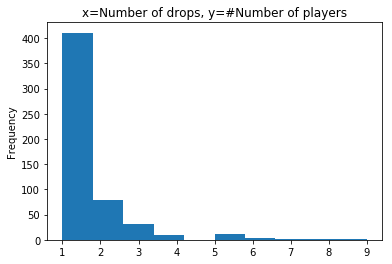

In [89]:
print("Using the player counts we can get a better understanding on player 'luck'")
player_counts.plot.hist(title='x=Number of drops, y=#Number of players')

<span style="color:green"><span style="font-family:Courier; font-size:large;">While there is a notion from the playerbase that they are "unlucky" for not getting more drops the reality is that 98% of the playerbase coasts at around 1-3 drops, 1 drop being the bulk of the playerbase. and this is on the LUCKIEST day we have logged so far. You are not unlucky that player is likely EXTREMELY lucky or more realistically they are actively killing valuable monsters much more frequently than you are in a given time span.</span></span> <br><br><br>

<center><span style="color:blue"><span style="font-family:Courier; font-size:x-large;">Let's Look at primal drops</span></span></center>

In [90]:
selected_type = loot_df.loc[loot_df['type'] == 'primal']
selected_type_tokens = loot_df.loc[loot_df['type']=='Necrotic']
combined = pd.merge(selected_type, selected_type_tokens, how='outer')

print(combined.head())
print('\n',combined.describe())

     player                item    type        date
0     krtel      Orb of Destiny  primal  2019-07-18
1  winybaby   Claw of the Beast  primal  2019-07-18
2    annual  Bone Splinter Robe  primal  2019-07-18
3   xproxod       Lycaon's Hide  primal  2019-07-18
4   xproxod        Wand of Bone  primal  2019-07-18

             player            item    type        date
count         4473            4473    4473        4473
unique         982              35       2         156
top     cocknibble  Orb of Destiny  primal  2019-06-30
freq            69             206    4018         105


<span style="color:green"><span style="font-family:Courier; font-size:large;">Showing just primals Cocknibble is insane with 69 primal drops<br> the most common primal the "Orb of Destiny".<br>
A very interesting thing to noticed here is that the 4,473 total drops are dropped by just 982 players, A massive increase
to the average notable drop count we saw erlier at just 1 per player, this is where the good players dwell.<br>
    </span></span><br>
    <center><span style="color:blue"><span style="font-family:Courier; font-size:large;">Time for a better visual, lets see if there are larger discrepencies.</span></span></center>

cocknibble    69
sniperb       49
paluuu        44
uta           43
femboy        40
Name: player, dtype: int64


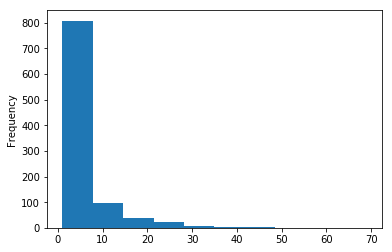

In [91]:
player_counts = combined.player.value_counts()
print(player_counts.head())
player_counts.plot.hist()

<span style="color:green"><span style="font-family:Courier; font-size:large;">I used the df.head function to show the top 5 players as far as dropped primals goes and then tossed ALL players onto a histogram, the X axist is the total Number of primals dropped by some player. The Y axis is the number of players that have dropped that many since there are so many people here, the scaling looks wonky, Cocknibble is alone up at 70 and you can't even see his bar he's that small of a portion of the playerbase. Playes are not "unlucky" they are simply skewed by seeing some of the more avid and non time-gated players go ham.<br><br></span></span> <center><span style="color:blue"><span style="font-family:Courier; font-size:large;">Let's look at specific items.</span></span></center>

Printing top 5 most common primals
Orb of Destiny           206
The Twilight Grimoire    198
Necklace of Fangs        193
Lycaon's Hide            192
Reaper's Bow             189
Name: item, dtype: int64


Printing the rarest primal
Amulet of Ascension    1
Name: item, dtype: int64




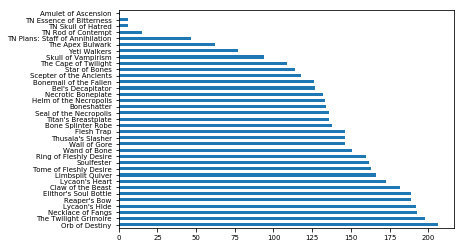

In [92]:
item_counts= combined.item.value_counts()
print("Printing top 5 most common primals")
print(item_counts.head())
print('\n')
print("Printing the rarest primal")
print(item_counts.tail(1))
print('\n')


item_counts.plot.barh(fontsize=7)


<span style="color:green"><span style="font-family:Courier; font-size:large;">Nothing out of the ordinary here tbh except the Amulet of Ascension, from what I understand only one has dropped an that guy is perm banned. The Annihilation Staff pieces sub labeled "TN" are very uncommon and rare as the staff is allegedlyop, Apex bulwark is actually VERY high up to where you would expectit to be, a large portion of them come from the necropolis tokens and not from the actual boss, its also not able to drop from chests now. All in all the drops are pretty straight forward, many of the items with 'more' drops are from the earlier bosses/chests where there are the most players applying for a chance at the drops. Currently the Amulet of Ascension is the rarest primal drop in the game, unless we include the staff of Annihilation and the banned amulet drop. </span></span><center><span style="color:blue"><span style="font-family:Courier; font-size:large;"> <br>Lets take another peak at the dates and see what we can learn from it.</span></span></center>


     player                item    type       date   weekday
0     krtel      Orb of Destiny  primal 2019-07-18  Thursday
1  winybaby   Claw of the Beast  primal 2019-07-18  Thursday
2    annual  Bone Splinter Robe  primal 2019-07-18  Thursday
3   xproxod       Lycaon's Hide  primal 2019-07-18  Thursday
4   xproxod        Wand of Bone  primal 2019-07-18  Thursday 

Sunday       11095
Saturday      8813
Monday        7652
Tuesday       7449
Wednesday     6865
Thursday      6846
Friday        5506
Name: weekday, dtype: int64


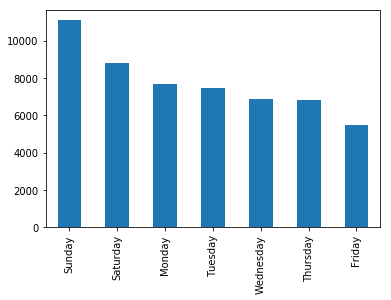

In [93]:
#Adding the weekday into our data
loot_df['date'] = pd.to_datetime(loot_df['date'])

loot_df['weekday'] = loot_df['date'].dt.day_name()

print(loot_df.head(),'\n')
weekdays = loot_df.weekday.value_counts()
print(weekdays)

weekdays.plot.bar()

<span style="color:green"><span style="font-family:Courier; font-size:large;">Expectedly Sunday has quite a bit more drops than the rest of the days, a good portion may be due to the 25% boost, but I do believe that with the showing from Saturday here that the increase is likely due to the player count rising on these days, Sunday having that promotion of a loot boost bonus on that day is certainly inviting to all new players though I do feel it's likely "free" advertising where the 25% boost likely doesn't benefit the player as much, but its more likely the player is putting in much more time on that day actively playing and killing monsters. Friday is a bit lower in comparison to the rest of the weekdays, I wonder why that may be, there may be a valid time where Mike is updating the rotf bot on fridays? Some days are much lower in drop count and death count due to this.</span></span> <br><br><center> <span style="color:blue"><span style="font-family:Courier; font-size:large;"> Let's stop looking at loot for now and venture into visualizing Death information</span></span></center>

       player  basefame       monster        date
0  mooonlight    1425.0  Spoilt Flesh  2019-07-18
1      pekson    1302.0       Thusala  2019-07-18
2    survivor     316.0       Thusala  2019-07-18
3  angelicpup    1288.5         Feral  2019-07-18
4    thiccbic     316.0         Feral  2019-07-18
Total death fame, logged 428095946.75
2019-03-24    2657
2019-03-23    2415
2019-03-31    2380
2019-04-14    2322
2019-03-30    2287
Name: date, dtype: int64


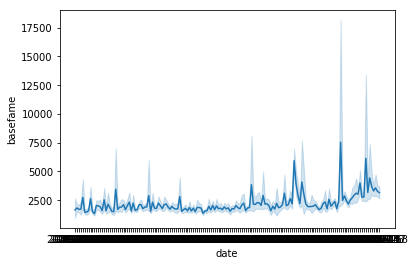

In [94]:
print(death_df.head())

print('Total death fame, logged',death_df.basefame.sum())
print(death_df.date.value_counts().head())
sns.lineplot(x='date',y='basefame',data=death_df)

This will take a few lines to explain, ignoring that blob of text above date and just looking at the lines and y axis you'll see the average fame gained for a death on each day. The darket shaded line is the genuine average and then the line above that is an anomally that was noted but seemingly not directly included as the basefame never goes above 17500, its been weighted down to ensure a somewhat clean visual representation of the data. Each of those lighter shaded peaks is someone killing off a THICK death fame character.  I am very curious to see what each day summed up looks like as well, it may give us a cleaner representation of the data.

         date   basefame
0  2019-07-18  2907992.0
1  2019-07-17  3680202.0
2  2019-07-16  3960302.0
3  2019-07-15  3820096.0
4  2019-07-14  4608302.0 

           date   basefame
44   2019-06-02  7639630.0
7    2019-07-11  7171914.0
103  2019-03-31  6702226.0
40   2019-06-06  6185842.0
110  2019-03-24  5782779.0


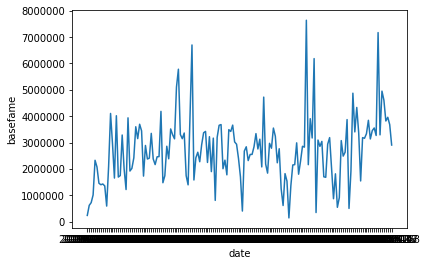

In [95]:
myData = {'date':[],'basefame':[]}
for eachDate in death_df.date.unique():
    myDate = death_df[death_df.date == eachDate]
    #print(round(myDate.basefame.sum()))
    myData['date'].append(eachDate)
    myData['basefame'].append(round(myDate.basefame.sum()))
   
date_death_df = pd.DataFrame.from_dict(data=myData)
print(date_death_df.head(),'\n')

print(date_death_df.sort_values('basefame', ascending=False).head())
sns.lineplot(x='date',y='basefame',data=date_death_df)

<span style="color:green"><span style="font-family:Courier; font-size:large;">when we create the total Sum of death fame for each day you can more cleanly see the larger death fame ticks when players like Wealthy, MrDuck and Eziiio killed off some very high grossing characters. You can also see one of the flaws with getting data from the discord bot, when it is down for any time you can see how the graph gets affected negatively. Some days the bots off for nearly the entire day could be due to server instability or someone updating/tweaking the bot. One thing we should not is that from left to the right time is progressing, the fame being attained via death is rising exponentially, likely due to players understanding the quest chest "meta" a bit more, many people are being funneled chests to get themselves and their guilds massive fame gains, with this persistant and clear increase to the sum of deathfame each day, it's safe to say that pure fame will become increasingly less valuable at a very spooky rate, I hope they have plans of sinking this fame some how I know quite a few ideas have been tossed around involving that.</span></span><br><br><center><span style="color:blue"><span style="font-family:Courier; font-size:large;">In Conclusion What can we learn from all of this?</span></span></center>

<span style="color:green"><span style="font-family:Courier; font-size:large;">We can see that drop rates for items can be closely correlated to a players actual time played, and not so much about "luck" the more high profile monsters you kill the more chances at a valuable primal or legendary you have, with the addition of Necropolis Tokens this shines even more, kill more, profit more.<br><br>Sundays Loot Boost certainly does seem to actively increase the amount of primals and legendaries dropped each Sunday, whether its from the actual 25% Boost or if its a placebo of sorts that makes players actively go out and kill monsters much more on those days is not really conclusive. I think  if they disabled the 25% boost, but kept the announcement there for a couple weeks we could get a better understanding of its actual use.<br><br>A players fame gain from deaths are becoming increasingly and rapidly higher on average, with the knowledge of chest funneling becoming more commong along with the addition of "epic" monster and chest proccing there appears to be a very linear and set in stone way for players to make fame. What was once spamming epic dungeons is now more along the lines of hopping into a necrop getting chests, maybe primals and tokens and funneling them all onto one character, you can either kill it off at 10k base where the final fame gain diminishing return hits or you can continue on to hit the legends leaderboard.</span></span><br><br>
    <center><span style="color:blue"><span style="font-family:Courier; font-size:large;">Necrop. Quest Chest Meta</span></span></center>
    <span style="color:orange"><span style="font-family:Courier; font-size:medium;">
<br><br><tab>A personal opinion on this that comes from experience with predicting things in games like these is that this is very bad for the games longevity. Allow me to explain a bit more, The guild I've played with since these boosts became a thing was No, they were nice enough to actually hear me out on death fame gaining potential and become the first players to really push for efficiency and ultimately became first guild with 100% fame boost 100% loot boost and if I did my predictions right you will see 25/25 character slots around August some time.<br><br> The initial strategy involving death fame sorcerers was a lot of fun and gated behind someones ability to avidly and tirelessly grind out the character to die on it, but the player remains actively playing and attentive to the game and its surroundings. The Idea is that you make a sorcerer get it 82/82 put on some very strong wisdom bonus gear with a PD scepter and one shot gods in the godlands with rare obsession on get 10k base fame grab the non tedious fame bonuses and kill it, rinse repeat. The gods give solid EXP/Fame, with the Release of Necropolis and the Epic Update Death Fame Sorcerers did see a resurgance the buff was amazing, Elithor's soul bottle and the primal scepter reduced the time it took to hit 10k basefame by about 38% from my math done ages ago. You had to actually go back out and run around for a while to hit the 4million tiles for that fame bonus, before it was usuall 200-300k extra tiles and then you're good to suicide the character. <br><br> When Necropolis first hit of course our entire guild lived in there, closing realms as fast as possible to see this great dungeon once again! (The dungeon is a great addition difficulty and second secret memes aside) It did not take long for us to realize it's potential with how frequent quest chests dropped in there, Thus the initial Eziiio funnel began, this was before the epic update but he still rocketed up to 1million leaderboard fame in a couple weeks, this translates to 2m guild fame at 100% fame boost. This became the staple to fame farming, glands farming does not compete with the Quest chest strategy, which is ok. Issues arise when the epic update hit.<br><br> The "Epic" update made it so that monsters that spawn have a chance to become epic increasing their stats (hp, size) and their Experience gain, the latter is extremely powerful for anyone talking fame gains. Quest chests are considered monsters and an entity that spawns, they can become epic,What was a solidified +16base fame(normal chest) and +48 base fame(epic chest) was now jumping all over, epic procs on chests past 10k bf can benefit you 300+ Base Fame the rate at which they came into the game did not get touched and the players understanding of this mechanic is at full power in the games current meta.<br><br> This is ok if a fame sink comes into play, the real issue isn't the fame gained necesarily, its the fame being stagnant(not being deleted) and the ways in which players get the fame. Godlands farming is obsolete, quest chests can take that torch it's totally fine, but in the current state of the game you will see people log in for a Necropolis collect the chests and hop off either using them for themselves or funneling them to another player. <br><br>The Quest Chest drop rate for all other aspects of the game is abysmal in comparison. If keeping chest this way is a sticking plan, perhaps consider alternative farming methods for the chests; For example Move the higher drop rates to the epic dungeon family (UDL,SPRITE,SNAKE PIT, Just about any dungeon that isn't locked to 1 per realm). Make players go out into the game for longer periods of time, as of right now you can safely be optimal logging in checking for new realms hopping into a necrop grabbing chests/primals checking if a realm is worth closing for a necrop(no one does this anymore, its just what we did when the dungeon came out) and logging out, letting the rotf bot ping you if something worth mentioning is there. Redisbursement of the quest chest drop rate tiering would be a great way to relatively stress free resolve some player retention, there are great updates all the time, the "Epic" update has been added onto successfully on many different iterations we can get a full all epic dungeon now, thats amazing, but it's time to entice players to touch the rest of your content, before they write the game off as a borderline deca event 2.0 scene.</span></span>